In [2]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
### loading the dataset
df = pd.read_csv('boston_housing_processed.csv')


df = df.drop("RM_category", axis=1)
X = df.drop('MEDV', axis=1)
y = df['MEDV']
# X = df.iloc[:,:-1]
# y = df.iloc[:,-1]
df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM_squared,LSTAT_log,price_per_room
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,43.230625,1.788421,3.650190
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,41.229241,2.316488,3.363962
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,51.624225,1.615420,4.829506
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,48.972004,1.371181,4.772792
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,51.079609,1.845300,5.065062


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Instantiation
xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 100, seed = 42)

# Fitting the model
xgb_r.fit(X_train, y_train)



/Users/solomon/Documents/Solo_docs/INTO_United_States/Learning_Path/Hope AI /Start Course/Week_2_Python/myevn/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [23:44:37] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:245: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'reg:linear'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [52]:
# Predict the model
pred = xgb_r.predict(X_train)


In [53]:
# RMSE Computation
rmse = np.sqrt(mean_squared_error(y_train, pred))
print("RMSE : % f" %(rmse))



feature_importances = xgb_r.feature_importances_
feature_score = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)
feature_score

RMSE :  0.002420


price_per_room    0.960042
RM                0.025975
CRIM              0.009015
LSTAT             0.002607
B                 0.000643
TAX               0.000412
NOX               0.000315
DIS               0.000272
PTRATIO           0.000254
INDUS             0.000204
AGE               0.000155
ZN                0.000053
RAD               0.000032
CHAS              0.000022
RM_squared        0.000000
LSTAT_log         0.000000
dtype: float32

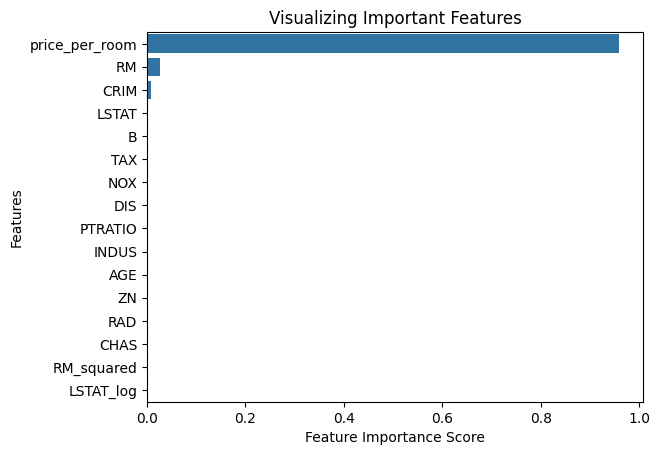

In [54]:
sns.barplot(x=feature_score, y=feature_score.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [55]:
xgb_r.score(X_test, y_test)

0.8852158403239938